In [1]:
!pip install google-cloud-bigquery google-auth db-dtypes

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
import pandas as pd

In [4]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('./multicampus_project_first_account.json')

In [5]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

===============================================================================================================================================================================================================================

In [41]:
# 1번 : 자동차 등록 수 자료
# 기준 : 2023년 10월 31일

sql = '''
SELECT
  Year,
  Total
FROM
  project_1.Registration_All
'''

In [42]:
df = client.query(sql).to_dataframe()
df

,Year,Total
0,2012,18799947
1,2013,19342840
2,2014,20007761
3,2015,20834381
4,2016,21672995
5,2017,22417307
6,2018,23091327
7,2019,23594014
8,2020,24250946
9,2021,24810637


Text(0, 0.5, '')

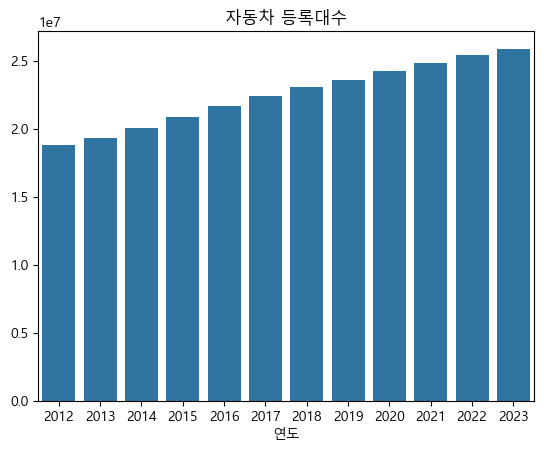

In [43]:
sns.barplot(
    data = df,
    x = 'Year',
    y = 'Total'
    ).set(
        title = '자동차 등록대수'
        )
plt.xlabel('연도')   # https://wikidocs.net/92081  x축,y축 레이블 설정
plt.ylabel('')


In [44]:
# 상승률 계산


answer = []
num = df['Total']

for i in range(len(df['Total'])-1):
    answer.append(round((num[i+1]-num[i])/num[i]*100,2))
print(answer)
print(sum(answer)/len(answer))

[2.89, 3.44, 4.13, 4.03, 3.43, 3.01, 2.18, 2.78, 2.31, 2.39, 1.84]
2.9481818181818182


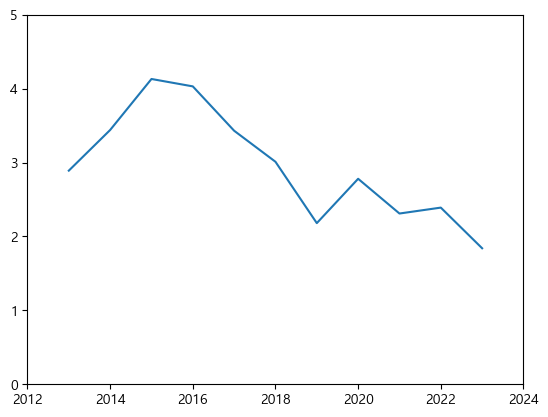

In [18]:
years = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
plt.plot(years,answer)
plt.xlim(2012,2024)
plt.ylim(0,5)
plt.show()

# 그래프 그리기 : https://wikidocs.net/92082

===============================================================================================================================================================================================================================

In [45]:
# 2번 : 전기차 등록 수 자료
# 기준 : 2023년 10월 31일

sql = '''
SELECT
  Year,
  Total
FROM
  project_1.Registration_EV
'''

In [46]:
df = client.query(sql).to_dataframe()
df

,Year,Total
0,2012,413
1,2013,436
2,2014,1452
3,2015,3559
4,2016,4605
5,2017,7447
6,2018,26791
7,2019,61258
8,2020,98446
9,2021,189664


Text(0, 0.5, '')

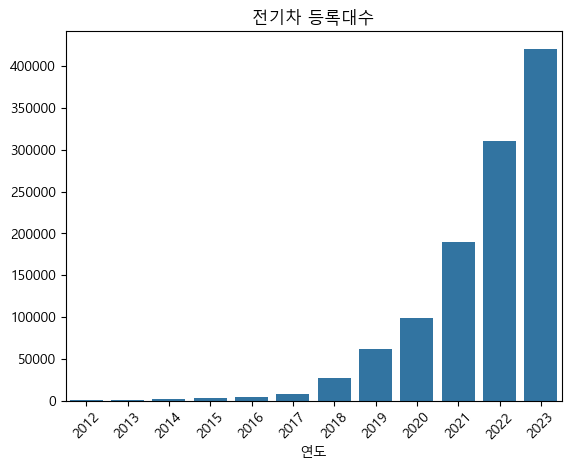

In [47]:
plt.xticks(rotation=45)
sns.barplot(
    data = df,
    x = 'Year',
    y = 'Total'
    ).set(
        title = '전기차 등록대수'
        )
plt.xlabel('연도')
plt.ylabel('')

In [50]:
# 상승률 계산


answer = []
num = df['Total']

for i in range(len(df['Total'])-1):
    answer.append(round((num[i+1]-num[i])/num[i]*100,2))
print(answer)
print(sum(answer)/len(answer))

[5.57, 233.03, 145.11, 29.39, 61.72, 259.76, 128.65, 60.71, 92.66, 63.87, 35.43]
101.44545454545455


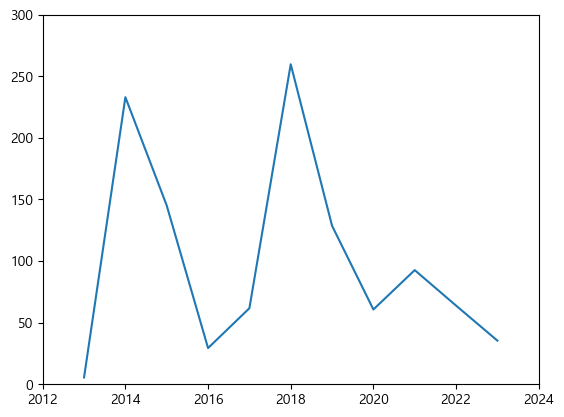

In [19]:
years = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
plt.plot(years,answer)
plt.xlim(2012,2024)
plt.ylim(0,300)
plt.show()

===============================================================================================================================================================================================================================

In [74]:
# 3  번 : 전체 충전소 vs 고속도로 충전소 수 비교
# 기준 : 2023년 11월 14일[Text(0.5, 1.0, 'The Number of Registered EV')]


sql = '''
SELECT
  COUNT(Facility_2)
FROM
  project_1.ChargingStations
WHERE
  Facility_2 LIKE '%휴게소%'
'''

In [75]:
df = client.query(sql).to_dataframe()
df

,f0_
0,1390


In [76]:
sql = '''
SELECT
  COUNT(Facility_2)
FROM
  project_1.ChargingStations
'''

In [77]:
df = client.query(sql).to_dataframe()
df

,f0_
0,265457


Text(0.5, 1.0, '충전소 등록대수')

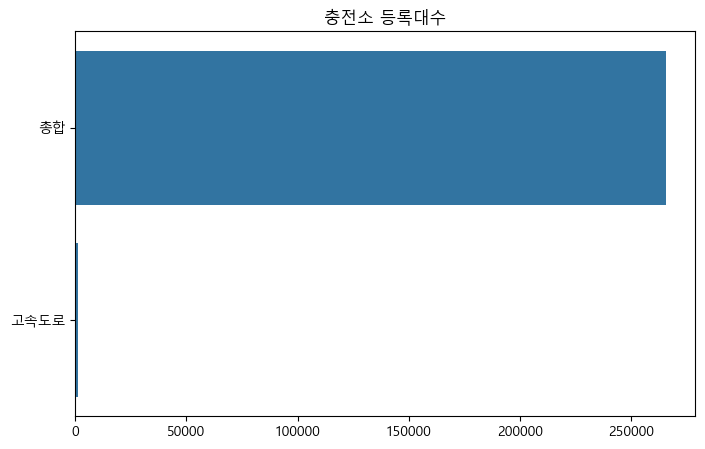

In [22]:
y = ['총합','고속도로']
x = [265457,1390]

# sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))   # https://rfriend.tistory.com/710
bar = sns.barplot(x=x,y=y)
plt.title('충전소 등록대수')


===============================================================================================================================================================================================================================

In [220]:
# 4 - 1 번 : 고속도로 평균 충전량
#timestamp_diff 구하기 https://dev-jwblog.tistory.com/137

sql = '''
SELECT
  COUNT(Type) AS number,
  Type,
  AVG(Amount) AS amount,
  AVG(TIMESTAMP_DIFF(End_Time,Start_Time,MINUTE)) AS time
FROM
  `apt-rite-404708.project_1.ChargingData_2023*`
WHERE
  Station_Name LIKE '%휴게소%'
GROUP BY
  Type
'''

In [221]:
df = client.query(sql).to_dataframe()
df

,number,Type,amount,time
0,162768,급속,23.233272,29.968292


In [227]:
# 4 - 2 번 : 고속도로 충전량 

sql = '''
SELECT
  Type,
  Amount
FROM
  `apt-rite-404708.project_1.ChargingData_2023*`
WHERE
 Station_Name LIKE '%휴게소%'
'''

df = client.query(sql).to_dataframe()
df

,Type,Amount
0,급속,21.83
1,급속,38.92
2,급속,2.95
3,급속,15.49
4,급속,7.76
...,...,...
162763,급속,34.24
162764,급속,20.38
162765,급속,2.99
162766,급속,40.76


<Axes: xlabel='Amount', ylabel='Count'>

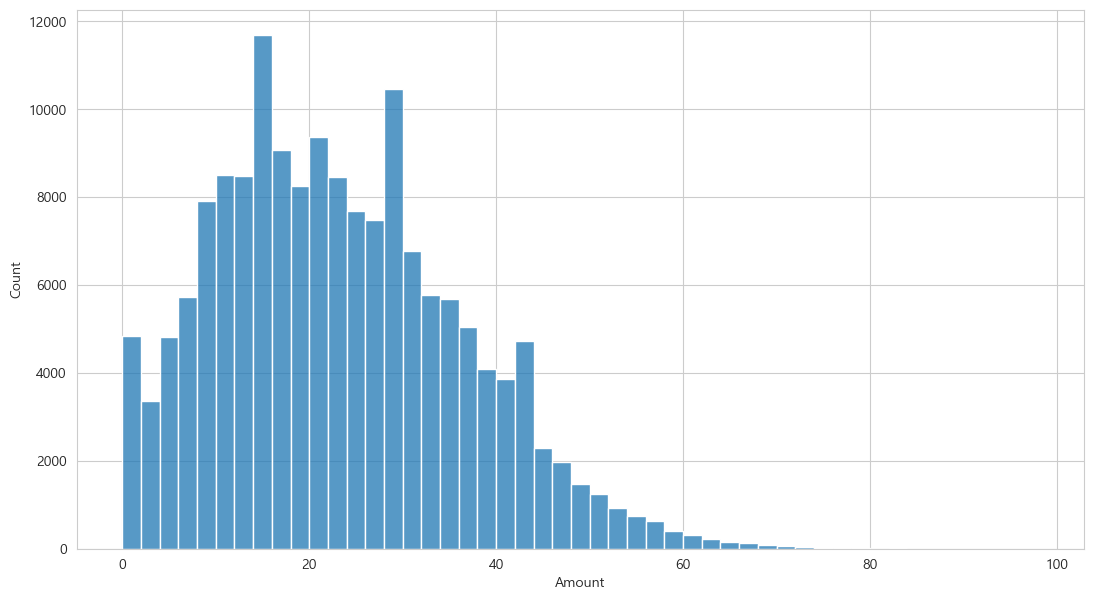

In [229]:
plt.figure(figsize=(13, 7))
sns.histplot(
    data = df,
    x = 'Amount',
    bins=[x for x in range(0,100,2)]
    )

In [230]:
# 4 - 3 번 : 고속도로 충전시간

sql = '''
SELECT
  Type,
  TIMESTAMP_DIFF(End_Time,Start_Time,MINUTE) AS time
FROM
  `apt-rite-404708.project_1.ChargingData_2023*`
WHERE
 Station_Name LIKE '%휴게소%'
'''

df = client.query(sql).to_dataframe()
df

,Type,time
0,급속,63
1,급속,96
2,급속,98
3,급속,97
4,급속,63
...,...,...
162763,급속,60
162764,급속,60
162765,급속,60
162766,급속,60


<Axes: xlabel='time', ylabel='Count'>

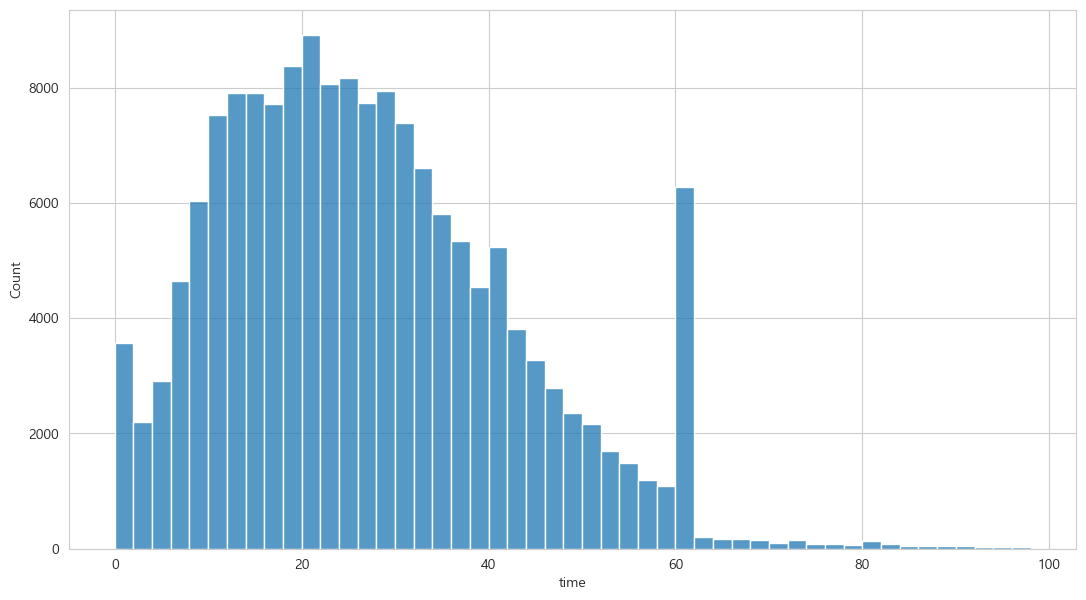

In [231]:
plt.figure(figsize=(13, 7))
sns.histplot(
    data = df,
    x = 'time',
    bins=[x for x in range(0,100,2)]
    )

In [ ]:
# 고속도로 노선 수 
sql = '''
SELECT
  COUNT(Route_Name),
  Route_Name
FROM
  project_1.Traffic_2023_11_12
GROUP BY
  Route_Name
'''

df = client.query(sql).to_dataframe()
df

In [30]:
# 5번 : 고속도로 통행량

sql = '''
SELECT
  Route_Name,
  SUM(Traffic_Volume) AS traffic
FROM
  project_1.Traffic_2023_11_12
GROUP BY
  Route_Name
ORDER BY
  traffic DESC
LIMIT
 15
'''

In [31]:
df = client.query(sql).to_dataframe()
df

,Route_Name,traffic
0,경부선,5789176
1,영동선,3237706
2,중부선-대전통영선A,2575357
3,남해선A,2466450
4,서해안선,2241936
5,중부내륙선,1670689
6,호남선A,1347689
7,수도권제2순환선,1128954
8,중앙선,1114516
9,당진상주선,1108760


Text(0, 0.5, '노선명')

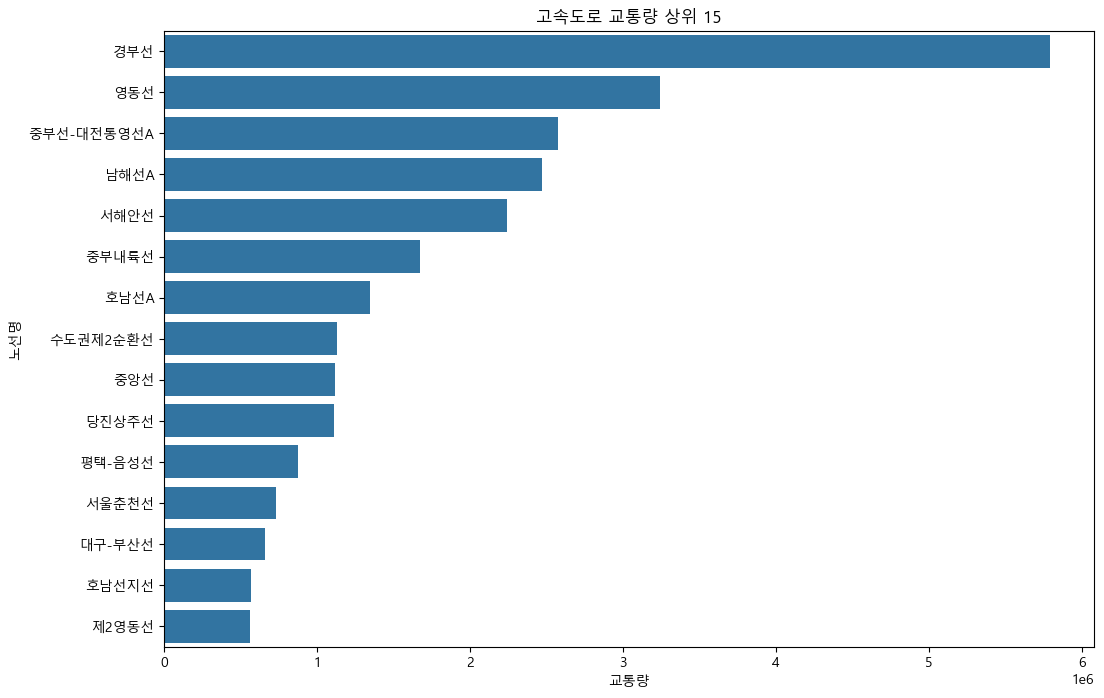

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data = df,
    x = 'traffic',
    y = 'Route_Name'
).set(
    
    title = '고속도로 교통량 상위 15'
)
plt.xlabel('교통량')
plt.ylabel('노선명')

===============================================================================================================================================================================================================================

In [33]:
# 6번 : 고속도로 통행량
# 기준 : 2022년 일평균


sql = '''
SELECT
  Section,
  SUM(DailyAverage) AS DA
FROM
  project_1.Traffic_2022
GROUP BY
  Section
ORDER BY
  SUM(DailyAverage) DESC
LIMIT
  15
'''

In [34]:
df = client.query(sql).to_dataframe()
df

,Section,DA
0,신갈JC~수원신갈,230936
1,남사진위~안성JC,219215
2,안성JC~안성,206406
3,동탄JC~오산,205811
4,서울~신갈JC,204767
5,수원신갈~기흥,202461
6,오산~안성JC,199993
7,오산~남사진위,199293
8,북천안~천안,192403
9,서서울~안산JC,191079


Text(0, 0.5, '고속도로 구간')

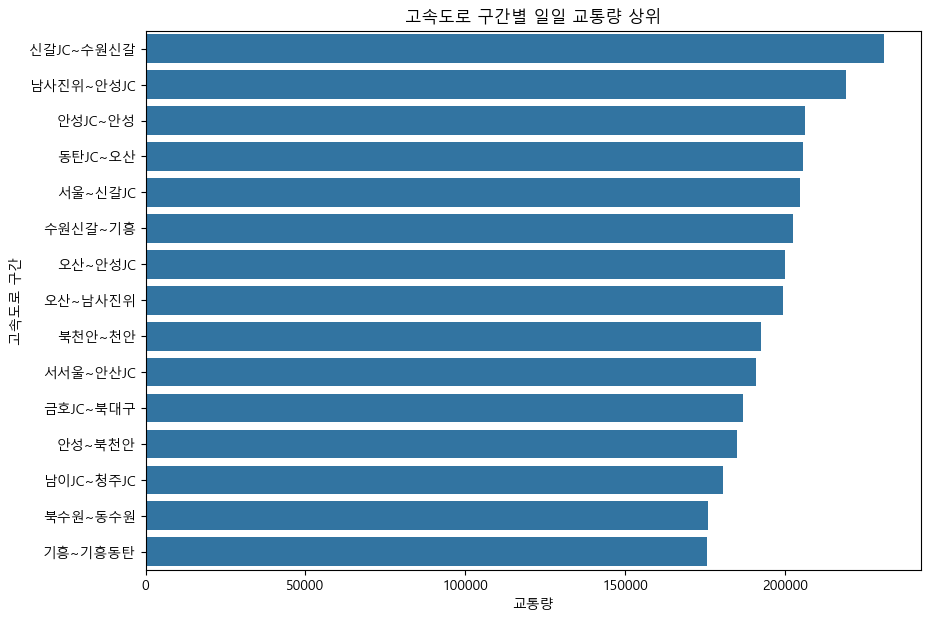

In [35]:
plt.figure(figsize=(10, 7))
sns.barplot(
    data=df,
    y='Section',
    x='DA'
).set(
    title = '고속도로 구간별 일일 교통량 상위'
)
plt.xlabel('교통량')
plt.ylabel('고속도로 구간')

===============================================================================================================================================================================================================================

이건 좀 아니잖아...............
그래프 다 해봤는데 너무많아서 다 이상함
결론 : 못씀
그럼 우짜라고?

In [51]:
sql = '''
SELECT
  COUNT(*)
FROM
 project_1.Traffic_RestArea
'''

df = client.query(sql).to_dataframe()
df

,f0_
0,207


In [36]:
# 7번 : 휴게소 이용객
# 기준 : 23년 8월 24일

sql = '''
SELECT
  Rest_Area_Name,
  Daily_Visitors
FROM
  project_1.Traffic_RestArea
WHERE
  Daily_Visitors IS NOT NULL
ORDER BY
  Daily_Visitors DESC
LIMIT
  15
'''

In [37]:
df = client.query(sql).to_dataframe()
df

,Rest_Area_Name,Daily_Visitors
0,입장거봉포도(서울),30425
1,안성(부산),19540
2,천안삼거리(서울),19488
3,화성(목포),18970
4,선산(양평),18577
5,안성(서울),18381
6,죽전(서울),18253
7,여주(강릉),18032
8,선산(창원),17814
9,행담도,16911


[Text(0.5, 1.0, '휴게소 방문객 상위 15')]

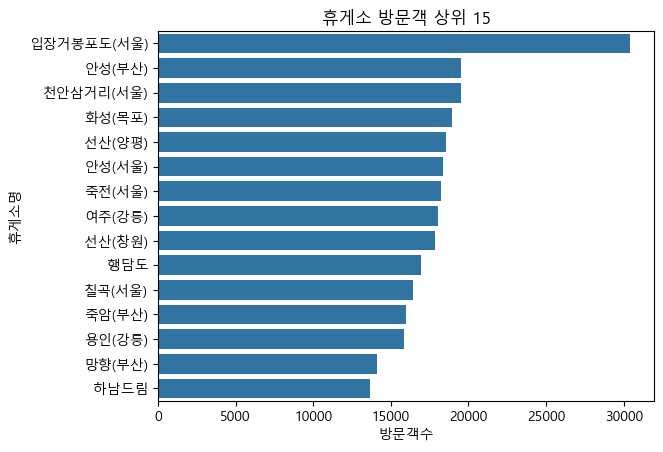

In [39]:
barplot = sns.barplot(
    data = df,
    y = 'Rest_Area_Name',
    x = 'Daily_Visitors'
).set(
    
    title = '휴게소 방문객 상위 15'
)

plt.xlabel('방문객수')
plt.ylabel('휴게소명')

barplot

===============================================================================================================================================================================================================================

결론도출 ( 함 해보고 )

고속도로 노선 교통량 상위 10개 -> 그중 노선 상위 10개 -> 그중 휴게소 방문대수 상위 10개

===============================================================================================================================================================================================================================

In [63]:
# 1 : 고속도로 노선 교통량 상위 5개
sql = '''
SELECT
  Route_Name,
  SUM(Traffic_Volume) AS traffic
FROM
  project_1.Traffic_2023_11_12
GROUP BY
  Route_Name
ORDER BY
  traffic DESC
LIMIT
 5
'''
df = client.query(sql).to_dataframe()
df

,Route_Name,traffic
0,경부선,5789176
1,영동선,3237706
2,중부선-대전통영선A,2575357
3,남해선A,2466450
4,서해안선,2241936


In [73]:
sql = '''
SELECT
  Rest_Area_Name,
  Daily_Visitors
FROM
  project_1.Traffic_RestArea
WHERE
 Route_Name IN ('경부선')
ORDER BY
  Daily_Visitors DESC
LIMIT
 5
'''
df = client.query(sql).to_dataframe()
df

,Rest_Area_Name,Daily_Visitors
0,입장거봉포도(서울),30425
1,안성(부산),19540
2,천안삼거리(서울),19488
3,안성(서울),18381
4,죽전(서울),18253


In [74]:
sql = '''
SELECT
  Rest_Area_Name,
  Daily_Visitors
FROM
  project_1.Traffic_RestArea
WHERE
 Route_Name IN ('영동선')
ORDER BY
  Daily_Visitors DESC
LIMIT
 5
'''
df = client.query(sql).to_dataframe()
df

,Rest_Area_Name,Daily_Visitors
0,여주(강릉),18032
1,용인(강릉),15870
2,횡성(강릉),13411
3,여주(인천),11043
4,용인(인천),10372


In [77]:
sql = '''
SELECT
  Rest_Area_Name,
  Daily_Visitors
FROM
  project_1.Traffic_RestArea
WHERE
 Route_Name IN ('중부선')
ORDER BY
  Daily_Visitors DESC
LIMIT
 5
'''
df = client.query(sql).to_dataframe()
df

,Rest_Area_Name,Daily_Visitors
0,하남드림,13632
1,이천(하남),10785
2,마장,10596
3,오창(남이),7973
4,오창(하남),7751


In [78]:
sql = '''
SELECT
  Rest_Area_Name,
  Daily_Visitors
FROM
  project_1.Traffic_RestArea
WHERE
 Route_Name IN ('남해선')
ORDER BY
  Daily_Visitors DESC
LIMIT
 5
'''
df = client.query(sql).to_dataframe()
df

,Rest_Area_Name,Daily_Visitors
0,진영(순천),10831
1,함안(순천),10351
2,문산(순천),9970
3,섬진강(부산),6749
4,섬진강(순천),6320


In [79]:
sql = '''
SELECT
  Rest_Area_Name,
  Daily_Visitors
FROM
  project_1.Traffic_RestArea
WHERE
 Route_Name IN ('서해안선')
ORDER BY
  Daily_Visitors DESC
LIMIT
 5
'''
df = client.query(sql).to_dataframe()
df

,Rest_Area_Name,Daily_Visitors
0,화성(목포),18970
1,행담도,16911
2,화성(서울),13292
3,서산(목포),8264
4,고창고인돌(목포),7663


끝